In [387]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fsolve
import pandas as pd 
import matplotlib.pyplot as plt 


In [388]:
#HJÆLPEFUNKTIONER



In [389]:
# constants
c = 0.5
gamma = 1
alpha = 3

# utility functions
def v1(y1):
    return gamma - alpha * y1

def v2(y2):
    return gamma - alpha * y2

# market share
def s0(y1, y2):
    return 1 / (1 + np.exp(v1(y1)) + np.exp(v2(y2)))

def s1(y1, y2):
    return np.exp(v1(y1)) / (1 + np.exp(v1(y1)) + np.exp(v2(y2)))

def s2(y2, y1):
    return np.exp(v2(y2)) / (1 + np.exp(v1(y1)) + np.exp(v2(y2)))

# profit funktioner
def profit1(y1, y2):
    return (y1 - c) * s1(y1, y2)

def profit2(y2, y1):
    return (y2 - c) * s2(y2, y1)

def profit(y): 
    assert y.size == 2 
    y1, y2 = y
    return profit1(y1,y2)+profit2(y2,y1)



Find nash ligevægten 

In [390]:

#%% Functions
def u1(y1, y2): 
    return profit1(y1, y2)

def u2(y2, y1): # note the order!
    return profit2(y2, y1)

def u(y): 
    assert y.size == 2 
    y1, y2 = y
    return u1(y1,y2) + u2(y2,y1)

print(u1(2,3))
print(u2(2,3))

y0 = np.array([0.5,0.5])

0.010035932238913671
0.010035932238913671


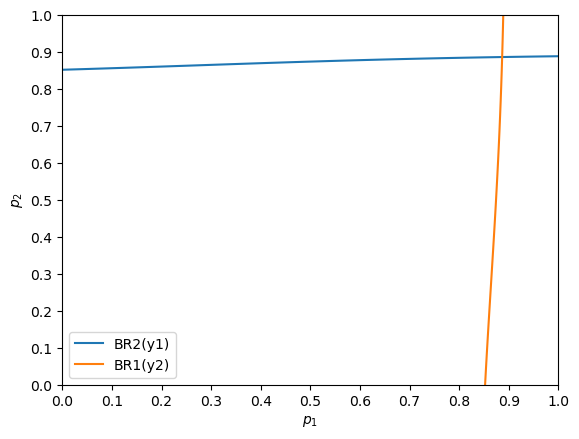

In [391]:
##NASH
# The Nash equilibrium is found where both players are best responding to each other. 
# We write the best response functions as numerical functions here; then we can re-use 
# them in other settings too 

    


def BR2(y1): 
    f = lambda y2, y1=y1 : -u2(y2=y2,y1=y1)
    res = minimize(f, y0[1])
    y2 = res.x
    return y2

def BR1(y2):
    f = lambda y1, y2=y2 : -u1(y1=y1,y2=y2)
    res = minimize(f, y0[0])
    y1 = res.x
    return y1

yy = np.linspace(0., 4., 100)
yy1 = np.empty(yy.shape)
yy2 = np.empty(yy.shape)
for i,y in enumerate(yy): 
    yy1[i] = BR1(y)
    yy2[i] = BR2(y)

plt.plot(yy, yy2, label='BR2(y1)')
plt.plot(yy1, yy, label='BR1(y2)')
plt.legend()

# Set axis limits and ticks
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Labels
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')

plt.show()



Opgave 3.1

In [395]:
   #%% Iterated Bast Response
# Not always guaranteed to converge, but when it does we know that we have a Nash equilibrium. 
# we set a max number of iterations to avoid infinite loops
def IBR(y0:np.ndarray, maxit=100, tol=1e-4) -> np.ndarray: 
    y1,y2 = y0 
    success = False

    for it in range(maxit): 
        y1_ = y1*1.
        y2_ = y2*1.

        y2 = BR2(y1)
        y1 = BR1(y2)
       

        if (np.abs(y1-y1_).max() < tol) and (np.abs(y2-y2_).max() < tol):
            print(f'IBR successful after {it} iterations')
            success = True
            break 

    if not success: 
        print(f'IBR failed after {it} iterations')

    return np.array([y1,y2])

yNE = IBR(y0)
print("spiller 1 og 2 sætter begge en pris på p =", yNE)


IBR successful after 2 iterations
spiller 1 og 2 sætter begge en pris på p = [[0.88659581]
 [0.88659581]]


Opgave 3.2

In [396]:
def BR_collude():
    f = lambda y: -(u1(y[0], y[1]) + u2(y[1], y[0]))
    res = minimize(f, y0)
    return res.x

result =BR_collude()
print("if they collude they each set the price at p =", result[0])

if they collude they each set the price at p = 0.9409969694003969


Opgave 3.3


In [398]:
from scipy.optimize import minimize
import numpy as np

# Negative profit functions (for minimization)
def neg_profit_firm1(p1, p2):
    return -(p1 - 0.5) * (np.exp(1 - 3*p1) / (np.exp(0) + np.exp(1 - 3*p1) + np.exp(1 - 3*p2)))

def neg_profit_firm2(p1, p2):
    return -(p2 - 0.5) * (np.exp(1 - 3*p2) / (np.exp(0) + np.exp(1 - 3*p1) + np.exp(1 - 3*p2)))

# Initial price guesses
p1, p2 = 1, 1

# Iteration settings
tolerance = 1e-6
max_iterations = 10000
iteration = 0

# Track changes for each price
delta_p1 = 1
delta_p2 = 1

while (delta_p1 > tolerance or delta_p2 > tolerance) and iteration < max_iterations:
    iteration += 1
    
    # Optimize p1 given p2
    res1 = minimize(lambda p1: neg_profit_firm1(p1[0], p2), x0=[p1], bounds=[(0, None)])
    new_p1 = res1.x[0]
    delta_p1 = np.abs(new_p1 - p1)
    p1 = new_p1
    
    # Optimize p2 given new p1 twice for better adjustment
    res2 = minimize(lambda p2: neg_profit_firm2(p1, p2[0]), x0=[p2], bounds=[(0, None)])
    new_p2 = res2.x[0]
    res2 = minimize(lambda p2: neg_profit_firm2(p1, p2[0]), x0=[new_p2], bounds=[(0, None)])
    new_p2 = res2.x[0]
    
    delta_p2 = np.abs(new_p2 - p2)
    p2 = new_p2

p1, p2

(0.8865908305380596, 0.8866113455288445)